<img src="img/img_covid.jpg">

# Análise da COVID-19 no Brasil

<strong>*Reescrever isso</strong><br>
O Coronavírus (COVID-19) é uma doença infecciosa causada por um vírus. Ele causa problemas respiratórios semelhantes à gripe e sintomas como tosse, febre e, em casos mais graves, dificuldade para respirar.

O Brasil teve seu primeiro caso de Coronavírus confirmado no dia 26/02/2020 em São Paulo. 14 dias após a descoberta do primeiro caso o país já começou a passar por algumas mudanças em sua rotina, como por exemplo, suspensão de aulas e eventos com número elevado de pessoas, fechamento de lojas, bares, restaurantes e shoppings, além de recomendações constantes sobre a importância do isolamento social no combate à doença. Um mês depois do primeiro caso diversas cidades estavam com as ruas vazias por conta das medidas de isolamento e o número de pessoas contaminadas já havia chegado a 1000, 

<hr style="height:1px;border-width:0;color:gray;background-color:#C0C0C0">

Nesse projeto farei uma análise mostrando a evolução da doença no país e nos estados com o maior número de casos, utilizando a base de dados do Painel Coronavírus (https://covid.saude.gov.br/)



In [1]:
#Importando as bibliotecas que utilizarei nesse projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando o dataset
cv = pd.read_csv('datasets/arquivo_geral.csv',sep=';')

### Analise inicial e tratamento dos dados

In [3]:
#lendo os 5 primeiros itens do dataset
cv.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
#Verificando as colunas, tipo de dados e se há dados faltando
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   regiao            2646 non-null   object
 1   estado            2646 non-null   object
 2   data              2646 non-null   object
 3   casosNovos        2646 non-null   int64 
 4   casosAcumulados   2646 non-null   int64 
 5   obitosNovos       2646 non-null   int64 
 6   obitosAcumulados  2646 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 113.8+ KB


In [5]:
#Gerando algumas estatisticas dos dados
cv.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,2646.000000,2646.000000,2646.000000,2646.000000
mean,47.323507,646.865079,3.226002,41.890023
std,178.954664,2476.755374,14.084123,198.887175
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000
75%,24.000000,274.000000,1.000000,9.000000
max,3800.000000,37853.000000,224.000000,3045.000000


In [6]:
#criando um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())
    
#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

df_por_data.head()

,data,casosAcumulados,obitosAcumulados,casosNovos,obitosNovos
0,2020-01-30,0,0,0,0
1,2020-01-31,0,0,0,0
2,2020-02-01,0,0,0,0
3,2020-02-02,0,0,0,0
4,2020-02-03,0,0,0,0


# Dados da doença no Brasil

### Casos confirmados, Óbitos e Letalidade

In [7]:
print('Atualmente no Brasil temos um total de {a} Casos de COVID-19 e {b} obitos. A letalidade dessa doença é de {c}%'
      .format(a=df_por_data['casosNovos'].sum(),b=df_por_data['obitosNovos'].sum(),c=round(df_por_data['obitosNovos'].sum()/df_por_data['casosNovos'].sum() * 100,1)))

Atualmente no Brasil temos um total de 125218 Casos de COVID-19 e 8536 obitos. A letalidade dessa doença é de 6.8%


### Estados com mais casos confirmados

In [8]:
#Pega sempre a informação do ultimo dia do dataset
ultimo_dia = cv[['casosAcumulados','data']].max()[1]

#Filtra os casos acumulados por estado com a maior quantiddade de casos
maior_n_casos = cv[cv['data'] == ultimo_dia][['estado','casosAcumulados']].sort_values(by='casosAcumulados',ascending=False)
#Corrige o indice
maior_n_casos.reset_index(inplace=True,drop=True)
#Renomeia as colunas
maior_n_casos.columns = [['Estado','Total de Casos']]
#imprime os 5 primeiros
maior_n_casos.head()

,Estado,Total de Casos
0,SP,37853
1,RJ,13295
2,CE,12304
3,PE,9881
4,AM,9243


A listagem acima mostra os 5 estados que possuem o maior numero de casos. É importante observar que esses estados têm algumas das metropoles do país, onde vivem um grande número de pessoas, ambiente ideal para a propagação do vírus. Desde o começo da pademia São Paulo lidera com o maior número de casos.

### Estados com menos casos confirmados

In [9]:
#Seleciona os estados com o menor numero de caso
maior_n_casos.tail()

,Estado,Total de Casos
22,RO,943
23,RR,932
24,MT,379
25,TO,351
26,MS,288


Um fato interessante nesses dados é que a quantidade de casos em Tocantins é muito menor que nos outros estados, se for comparar com São Paulo por exemplo, o número é 120 vezes menor. Dois fatores podem estar relacionados com esses números, o primeiro é o fato de Tocantis não possuir uma grande metrópole ou ser um polo industrial que são características que os estados com o maior número de contaminados possuem, outro fator pode estar relacionado com a subnotificação dos casos, problema que vem sendo levantado por diversos canais de noticias em todo o país.

### Evolução da doença por dia no Brasil

In [10]:
#Setando um fundo branco nos gráficos
sns.set_style("whitegrid")

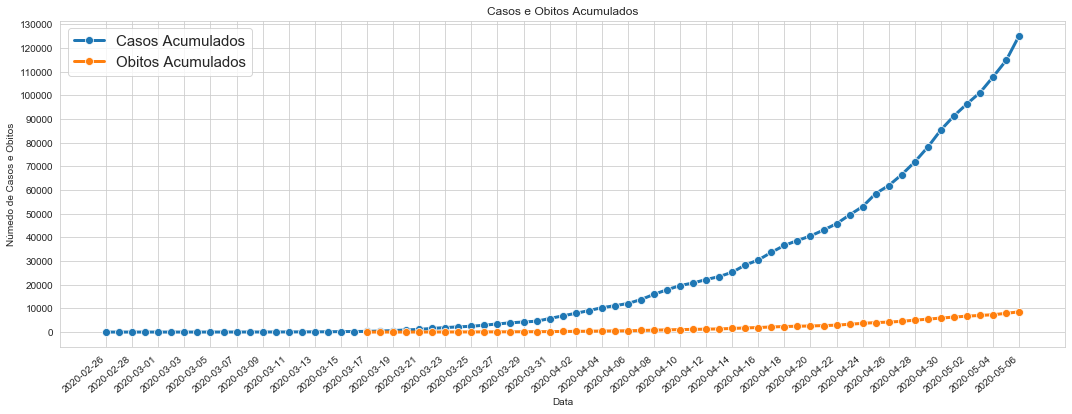

In [11]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,6))
#Gerando gráfico de linha
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Obitos Acumulados')

#Aumenta a legenda
plt.yticks(np.arange(0,df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'].max() + 5000,10000))
#Inclina o X e mostra os dias de maneira espaçada
plt.xticks(df_por_data['data'][27::2],rotation=40, horizontalalignment='right')
#Insere o título e a descrição de X e Y
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Númedo de Casos e Obitos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

O gráfico acima mostra a evolução da doença no país desde o primeiro dia, nele é possivel observar que os casos confirmados estão aumentando cada vez mais, sem sinal de diminuição. 

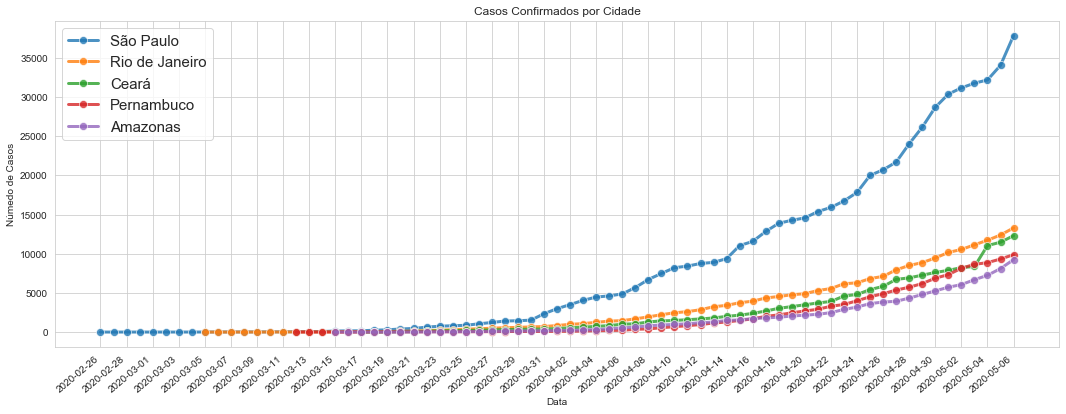

In [12]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data) DOS ESTADOS MAIS ATINGIDOS

plt.figure(figsize=(18,6))
#Gerando gráfico de linha
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='São Paulo',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'RJ')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Rio de Janeiro',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'CE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Ceará',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'PE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Pernambuco',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'AM')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Amazonas',alpha=0.8)
#Aumenta a legenda
plt.yticks(np.arange(0,cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'].max() + 1000,5000))
#Inclina o X e mostra os dias de maneira espaçada
plt.xticks(df_por_data['data'][27::2],rotation=40, horizontalalignment='right')
plt.title('Casos Confirmados por Cidade')
plt.ylabel('Númedo de Casos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

Este outro gráfico mostra o crescimento dos casos apenas nas cidades mais afetadas, São Paulo, Rio de Janeiro, Ceará, Pernambuco e Amazonas.

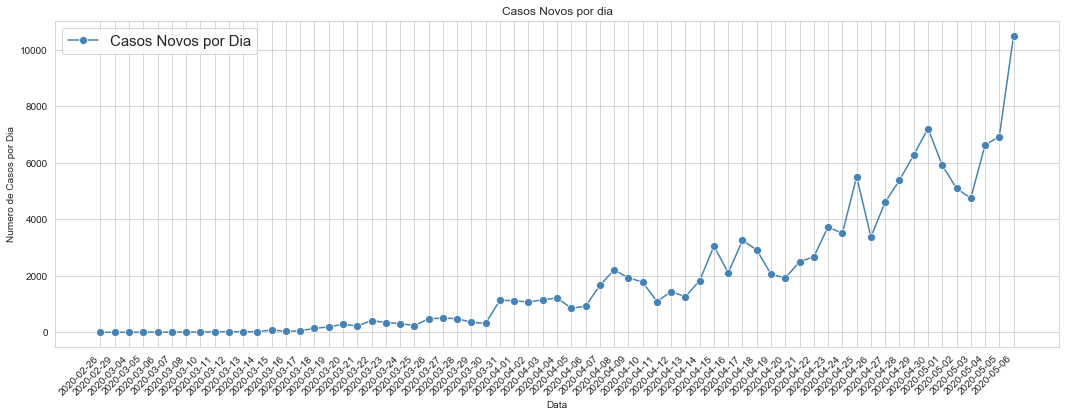

In [13]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,6))
#Cria um gráfico de linhas
sns.lineplot(x='data',y=df_por_data[df_por_data['casosNovos'] >= 1]['casosNovos'],data=df_por_data,marker='o',
             markersize=8,color='#4682B4',label='Casos Novos por Dia')

#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
#Insere o título e a descrição de X e Y
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumenta tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
#Imprime a legenda
plt.legend()

plt.show()

É possivel observar o aumento no número de casos por dia, o número de novos contaminados apresenta diminuição em alguns dias mas infelizmente volta a crescer, o registro mais alto até o momento foi de 5514 novos casos em um dia.

### Quantidade de infectados e óbitos por região e estado

              Casos Confirmados
regiao                         
Sudeste                   57321
Nordeste                  38231
Norte                     19475
Sul                        6594
Centro-Oeste               3597


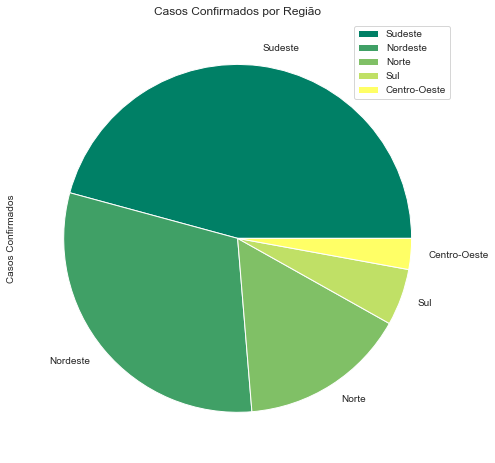

In [14]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Confirmados']
#Imprime o total de casos confirmados por região
print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
#Imprime o gráfico de pizza
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='summer')
#Insere o título
plt.title('Casos Confirmados por Região')

plt.show()

Neste gráfico é possível obeservar a diferança na quantidade de contaminados entre as regiões do Brasil. As regiões sudeste e nordeste são as que estão registrando a maior quantidade de casos.

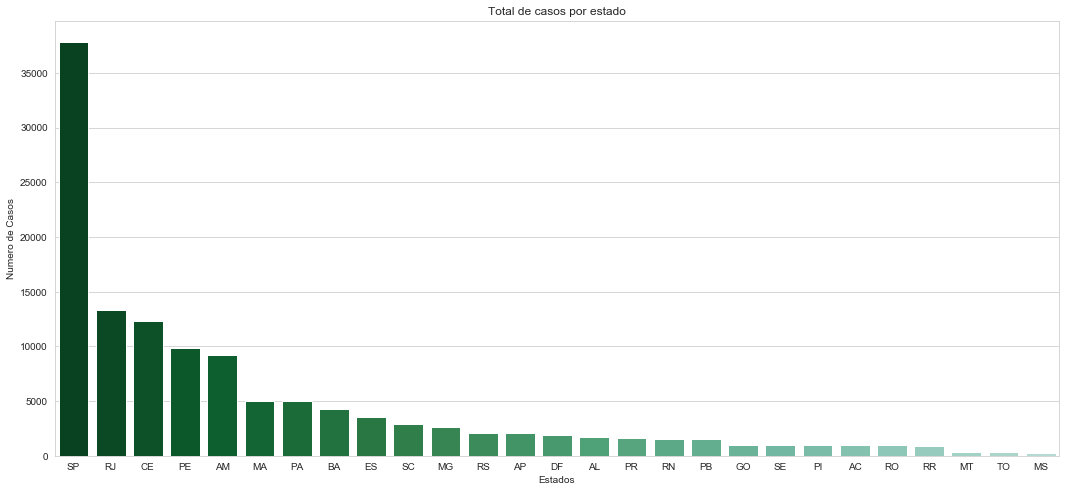

In [15]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()
#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,8))
#Imprime um gráfico de barras
sns.barplot(x='estado',y='casosNovos',data=total_casos_por_estado,
            palette=sns.color_palette("BuGn_r",n_colors=len(total_casos_por_estado)+12 ))
#Insere o título e a descrição de X e Y
plt.title('Total de casos por estado')
plt.ylabel('Numero de Casos')
plt.xlabel('Estados')

plt.show()

Estados como São Paulo, Rio de Janeiro, Ceará, Pernambuco e Amazonas têm alertado para uma possível falta de leitos baixa complexidade e leitos de UTI devido ao aumento no número de pacientes. <a href="https://saude.estadao.com.br/noticias/geral,sp-tem-registro-recorde-de-mortes-por-coronavirus-grande-sp-tem-81-dos-leitos-de-uti-ocupados,70003285762" target="_blank">São Paulo</a>, cidade que possui a maior quantidade de casos confirmados está com 81% dos seus leitos de UTI ocupados, as outras cidades mostram um número ainda maior, <a href="https://oglobo.globo.com/rio/coronavirus-97-dos-leitos-publicos-de-uti-no-rio-estao-ocupados-24394308" target="_blank">Rio de Janeiro</a> está com 97%, <a href="https://g1.globo.com/ce/ceara/noticia/2020/04/26/taxa-de-ocupacao-de-leitos-de-uti-chega-a-98percent-em-fortaleza-diz-secretaria-da-saude-do-ceara.ghtml" target="_blank">Fortaleza</a> 98%, <a href="https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/04/22/pernambuco-mortes-coronavirus.htm" target="_blank">Recife</a> está com 99% e <a href="https://g1.globo.com/am/amazonas/noticia/2020/04/28/amazonas-tem-mais-de-400-novos-casos-de-covid-19-e-total-sobe-para-4337-mortes-chegam-a-351.ghtml" target="_blank">Manaus</a> está a beira de um colapso no sistema se saúde, com 90% dos leitos baixa complexidade e 96% dos de UTI ocupados. Situações como falta de vagas em hospitais é uma das principais preocupações dos governadores e prefeitos no momento, pois um colapso no sistema de saúde não impactaria apenas pacientes contaminados pelo COVID-19, mas todos os cidadãos.

              Óbitos Confirmados
regiao                          
Sudeste                     4492
Nordeste                    2408
Norte                       1287
Sul                          247
Centro-Oeste                 102


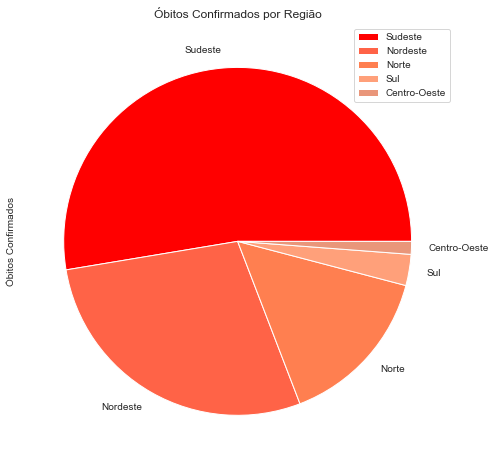

In [16]:
#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Óbitos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
#Imprime o gráfico de pizza
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),colors=['#FF0000','#FF6347','#FF7F50','#FFA07A','#E9967A'])
#Insere o título
plt.title('Óbitos Confirmados por Região')

plt.show()

Outro ponto que preocupa é o aumento no número de óbitos, principalmente nas regiões mais afetadas pois além de correrem risco de um colapso no sistema de saúde, há casos de cidades enfrentando dificuldades com o sistema funerário.

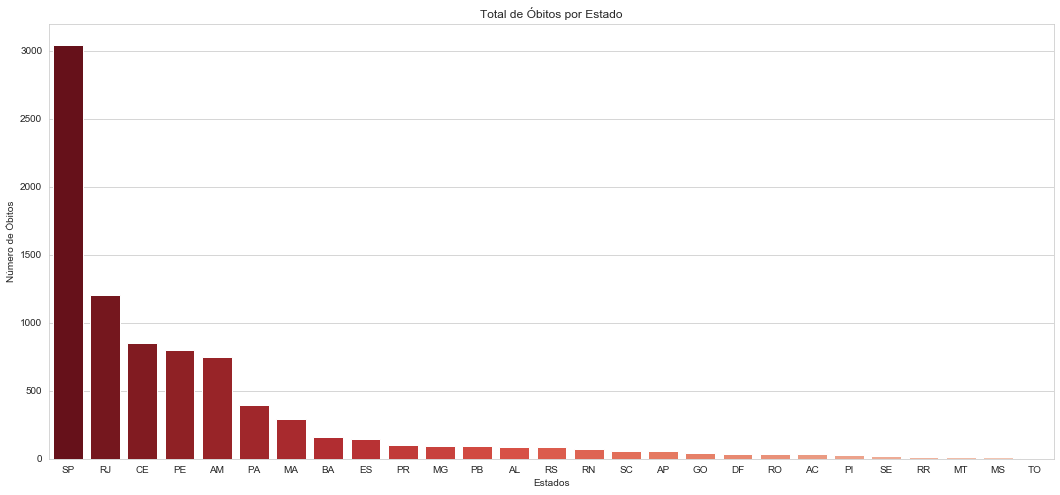

In [17]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()
#Imprime um gráfico de barras
plt.figure(figsize=(18,8))
sns.barplot(x='estado',y='obitosNovos',data=total_casos_por_estado,
            palette=sns.color_palette('Reds_r',n_colors=len(total_casos_por_estado)+6))
#Insere o título e a descrição de X e Y
plt.title('Total de Óbitos por Estado')
plt.ylabel('Número de Óbitos')
plt.xlabel('Estados')

plt.show()

O aumento no número de mortes tem forçado cidades a criar medidas para evitar uma crise no sistema funerário. <a href='https://oglobo.globo.com/sociedade/coronavirus/em-colapso-pelo-coronavirus-manaus-enterra-1249-em-duas-semanas-ja-teme-falta-de-caixoes-24388568' target="_blank">Manaus</a>, que é uma das cidades mais afetadas pela epidemia teme a falta de caixões, inclusive, encomendou 2 mil urnas das regiões de São Paulo, Santa Catarina e Rio Grande do Sul e em meio a isso têm realizado enterros em valas comuns devido ao alto número de mortos. No <a href='https://oglobo.globo.com/rio/bairros/coronavirus-novos-tumulos-serao-abertos-no-cemiterio-do-marui-em-niteroi-24389375' target="_blank">Rio de Janeiro</a>, a prefeitura da cidade decidiu criar novas vagas no cemitério para reforçar o sistema funerário, <a href='https://extra.globo.com/noticias/coronavirus/paulistanos-nao-poderao-escolher-cemiterio-onde-enterrar-parentes-com-agravamento-da-crise-24398384.html' target="_blank">São Paulo</a> e <a href='https://radiojornal.ne10.uol.com.br/noticia/2020/04/28/cemiterios-do-recife-se-preparam-para-alta-de-mortes-por-coronavirus-187716' target="_blank">Recife</a> tem tomado atitudes semelhantes para lidar com as mortes causadas pelo vírus.

In [18]:
#Casos por semana

In [28]:
#Pensar em mais informações:

#comparar países da américa latina (talvez)

<hr style="height:5px;border-width:0;color:gray;background-color:black">

# TESTES

<hr style="height:5px;border-width:0;color:gray;background-color:black">

## Casos e mortes por semana

In [20]:
#Casos por semana

#primeio, separar as semanas

df_semana = df_por_data.copy()

df_semana['dh'] = pd.to_datetime(df_semana['data'])
#datinha = df_semana['dh'].iloc[0]
#datinha.weekofyear

df_semana['semana'] = df_semana['dh'].apply(lambda data: data.weekofyear)
df_semana.tail()

,data,casosAcumulados,obitosAcumulados,casosNovos,obitosNovos,dh,semana
93,2020-05-02,96396,6724,5097,395,2020-05-02,18
94,2020-05-03,101147,7025,4751,301,2020-05-03,18
95,2020-05-04,107780,7321,6633,296,2020-05-04,19
96,2020-05-05,114715,7921,6935,600,2020-05-05,19
97,2020-05-06,125218,8536,10503,615,2020-05-06,19


In [21]:
semana = df_semana['semana'].unique()
soma_contaminados_semana = []
soma_mortos_semana = []
for i in semana:
    soma_contaminados_semana.append(df_semana[df_semana['semana'] == i]['casosNovos'].sum())
    soma_mortos_semana.append(df_semana[df_semana['semana'] == i]['obitosNovos'].sum())


In [22]:
semana = pd.Series(semana)
semana_df = semana.to_frame(name='semana')
semana_df['casos_semana'] = soma_contaminados_semana
semana_df['mortos_semana'] = soma_mortos_semana

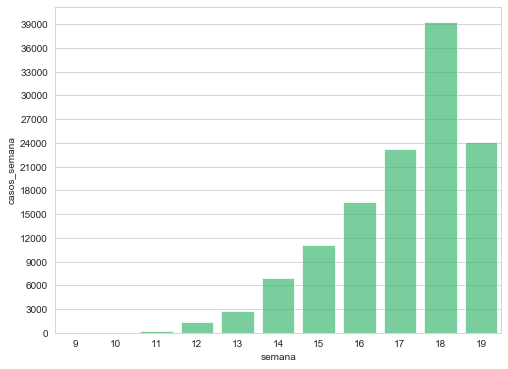

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x=semana_df[semana_df['semana'] >= 9]['semana'],y='casos_semana',data=semana_df,color='#2ecc71',alpha=0.7)
#sns.barplot(x=semana_df[semana_df['semana'] >= 9]['semana'],y='mortos_semana',data=semana_df,color='#e74c3c',alpha=0.7)
plt.yticks(np.arange(0,semana_df['casos_semana'].max()+1000,3000))
plt.show()

plt.title('Total de casos por semana')
plt.ylabel('Numero de Casos')
plt.xlabel('Semana')

## Procurando um gráfico que explique melhor os casos por dia

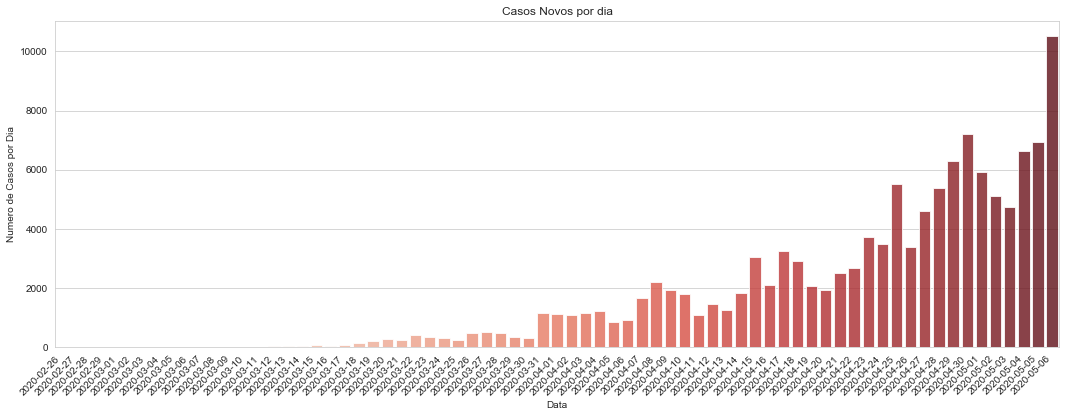

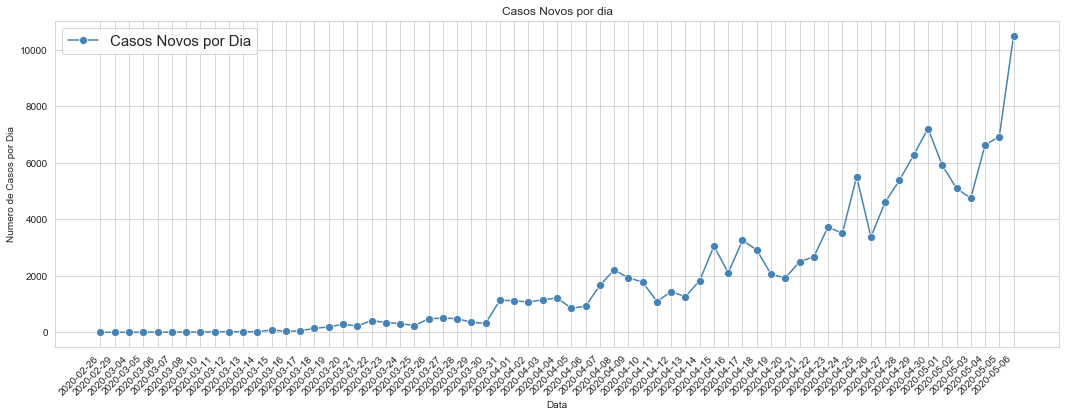

In [24]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,6))
#Cria um gráfico de barras
sns.barplot(x=df_semana[df_semana['dh'] >= '2020-02-26']['data'],y=df_semana[df_semana['casosNovos'] >= 1]['casosNovos'],
            data=df_semana,palette='Reds',alpha=0.8)


#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')

#Insere o título e a descrição de X e Y
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumenta tamanho da legenda 
#plt.rcParams['legend.fontsize'] = 15
#Imprime a legenda
#plt.legend()

plt.show()
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,6))
#Cria um gráfico de linhas
sns.lineplot(x='data',y=df_semana[df_semana['casosNovos'] >= 1]['casosNovos'],data=df_semana,marker='o',
             markersize=8,color='#4682B4',label='Casos Novos por Dia')

#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
#Insere o título e a descrição de X e Y
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumenta tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
#Imprime a legenda
plt.legend()

plt.show()

## Teste dia da semana

In [25]:
def set_semana(var):
    dia_semana = ['seg','ter','qua','qui','sex','sab','dom']
    return dia_semana[var.dayofweek]
    
#dia = df_semana['dh'].iloc[75]
#set_semana(dia)
#dia.dayofweek

In [26]:
df_semana['dsemana'] = df_semana['dh'].apply(lambda x: set_semana(x))

In [27]:
df_semana.head()

,data,casosAcumulados,obitosAcumulados,casosNovos,obitosNovos,dh,semana,dsemana
0,2020-01-30,0,0,0,0,2020-01-30,5,qui
1,2020-01-31,0,0,0,0,2020-01-31,5,sex
2,2020-02-01,0,0,0,0,2020-02-01,5,sab
3,2020-02-02,0,0,0,0,2020-02-02,5,dom
4,2020-02-03,0,0,0,0,2020-02-03,6,seg
